# Testing of the patt_mcmc module's adjustment types

In [1]:
from patt_mcmc import patt_mcmc
import mcmc_utils as mcu
import plotting_functions as pfs
import numpy as np
import numpy.linalg as alg
import numpy.random as rnd
import matplotlib.pyplot as plt

In [2]:
d = 37
n_chains = 10
x_0s = rnd.normal(size=(n_chains,d))
w = d

### No Transformation

In [3]:
n_burn = 0
n_its = int(1e4)

In [4]:
def log_density(x):
    return -alg.norm(x)

In [5]:
rets = patt_mcmc(
    log_density,
    n_chains,
    n_burn,
    n_its,
    x_0s,
    hyper_att=w
)

Checking validity of given arguments...
Preparing for parallel sampling...
Preparing for ATT sampling...
Starting ATT sampling...


  0%|          | 0/10001 [00:00<?, ?it/s]

Assembling output...


In [6]:
samples = rets['samples']
tde_cnts = rets['tde_cnts']
runtimes = rets['runtimes']

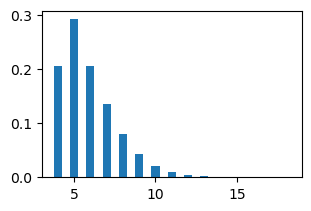

In [7]:
pfs.plot_tde_distr(tde_cnts[1:])

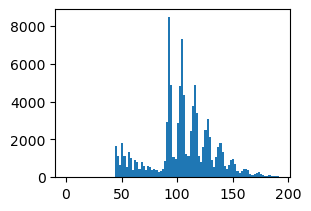

In [8]:
pfs.plot_runtime_hist(runtimes, nbins=100, cutoff_quant=0.99)

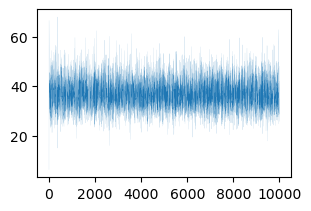

In [9]:
radii = mcu.get_radii(samples[:,0])
pfs.trace_plot(radii, lw=0.05)

### Mean-Centering

In [10]:
n_burn = int(1e3)
n_its = int(1e5)

In [11]:
c = np.arange(1,d+1)

def log_density(x):
    return -alg.norm(x - c)

In [12]:
rets = patt_mcmc(
    log_density,
    n_chains,
    n_burn,
    n_its,
    x_0s,
    "mean",
    hyper_burn=w,
    hyper_att=w,
)

Checking validity of given arguments...
Preparing for parallel sampling...
Preparing for init burn-in period...
Starting init burn-in sampling...
Preparing for ATT sampling...
Starting ATT sampling...


  0%|          | 0/100001 [00:00<?, ?it/s]

Assembling output...


In [13]:
burn_in = rets['burn-in']
tde_cnts_burn = rets['tde_cnts_burn']
samples = rets['samples']
means = rets['means']
schedule = rets['schedule']
tde_cnts = rets['tde_cnts']
runtimes = rets['runtimes']

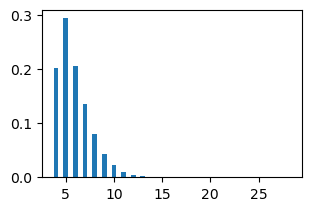

In [14]:
pfs.plot_tde_distr(tde_cnts[1:])

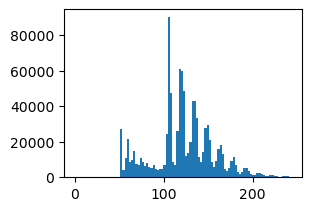

In [15]:
pfs.plot_runtime_hist(runtimes, nbins=100, cutoff_quant=0.99)

In [16]:
# compare recursively computed sample mean with naively computed one
alg.norm(means[-1] - np.mean(samples, axis=(0,1)))

2.8659947805321253e-12

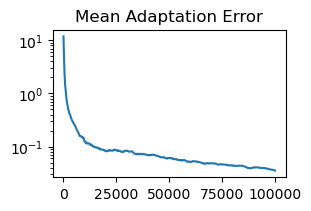

In [17]:
pfs.plot_ada_progress_testing(schedule, means, c, "Mean")

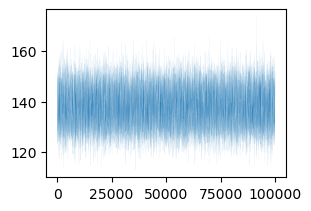

In [18]:
radii = mcu.get_radii(samples[:,0])
pfs.trace_plot(radii)

### Median-Centering

In [19]:
n_burn = int(1e3)
n_its = int(1e5)

In [20]:
c = np.arange(1,d+1)

def log_density(x):
    return -alg.norm(x - c)

In [21]:
rets = patt_mcmc(
    log_density,
    n_chains,
    n_burn,
    n_its,
    x_0s,
    "medi",
    hyper_burn=w,
    hyper_att=w,
)

Checking validity of given arguments...
Preparing for parallel sampling...
Preparing for init burn-in period...
Starting init burn-in sampling...
Preparing for ATT sampling...
Starting ATT sampling...


  0%|          | 0/100001 [00:00<?, ?it/s]

Assembling output...


In [22]:
burn_in = rets['burn-in']
samples = rets['samples']
medians = rets['medians']
schedule = rets['schedule']
tde_cnts = rets['tde_cnts']
runtimes = rets['runtimes']

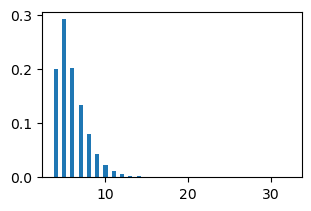

In [23]:
pfs.plot_tde_distr(tde_cnts[1:])

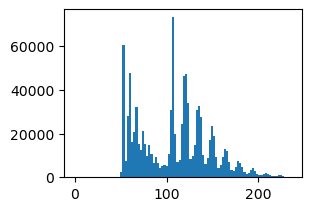

In [24]:
pfs.plot_runtime_hist(runtimes, nbins=100, cutoff_quant=0.99)

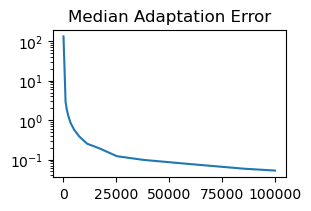

In [25]:
pfs.plot_ada_progress_testing(schedule, medians, c, "Median")

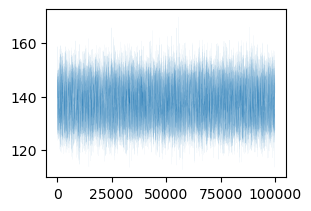

In [26]:
radii = mcu.get_radii(samples[:,0])
pfs.trace_plot(radii)

### Variance Adjustments

In [27]:
n_burn = int(1e3)
n_its = int(1e5)

In [28]:
std = np.arange(2,d+2)

def log_density(x):
    return -alg.norm(x / std)**2 / 2

In [29]:
rets = patt_mcmc(
    log_density,
    n_chains,
    n_burn,
    n_its,
    x_0s,
    cov_mode="var",
    hyper_burn=w,
    hyper_att=w,
)

Checking validity of given arguments...
Preparing for parallel sampling...
Preparing for init burn-in period...
Starting init burn-in sampling...
Preparing for ATT sampling...
Starting ATT sampling...


  0%|          | 0/100001 [00:00<?, ?it/s]

Assembling output...


In [30]:
burn_in = rets['burn-in']
samples = rets['samples']
means = rets['means']
std_devs = rets['std_devs']
schedule = rets['schedule']
tde_cnts = rets['tde_cnts']
runtimes = rets['runtimes']

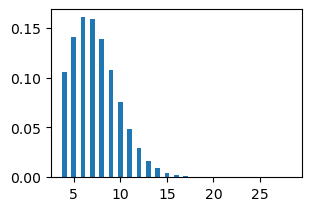

In [31]:
pfs.plot_tde_distr(tde_cnts[1:])

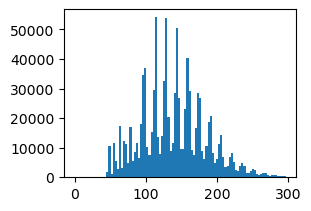

In [32]:
pfs.plot_runtime_hist(runtimes, nbins=100, cutoff_quant=0.99)

In [33]:
# compare recursively computed sample mean with naively computed one
alg.norm(means[-1] - np.mean(samples, axis=(0,1)))

4.1609822864820854e-15

In [34]:
# compare recursively computed standard devs with naively computed one
alg.norm(std_devs[-1] - np.std(samples, axis=(0,1)))

6.894627971966301e-05

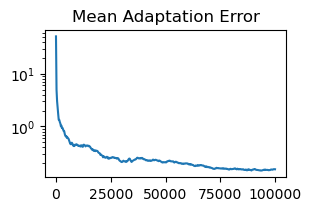

In [35]:
pfs.plot_ada_progress_testing(schedule, means, np.zeros(d), "Mean")

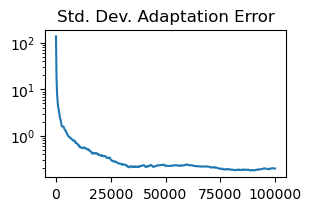

In [36]:
pfs.plot_ada_progress_testing(schedule, std_devs, std, "Std. Dev.")

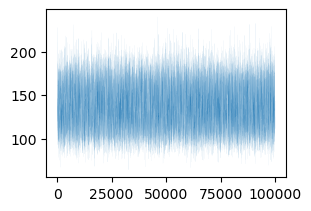

In [37]:
radii = mcu.get_radii(samples[:,0])
pfs.trace_plot(radii)

### Mean-Centering and Variance Adjustments

In [38]:
n_burn = int(1e3)
n_its = int(1e5)

In [39]:
c = np.arange(1,d+1)
std = np.arange(2,d+2)

def log_density(x):
    return -alg.norm((x - c) / std)**2 / 2

In [40]:
rets = patt_mcmc(
    log_density,
    n_chains,
    n_burn,
    n_its,
    x_0s,
    cen_mode="mean",
    cov_mode="var",
    hyper_burn=w,
    hyper_att=w,
)

Checking validity of given arguments...
Preparing for parallel sampling...
Preparing for init burn-in period...
Starting init burn-in sampling...
Preparing for ATT sampling...
Starting ATT sampling...


  0%|          | 0/100001 [00:00<?, ?it/s]

Assembling output...


In [41]:
burn_in = rets['burn-in']
samples = rets['samples']
means = rets['means']
std_devs = rets['std_devs']
schedule = rets['schedule']
tde_cnts = rets['tde_cnts']
runtimes = rets['runtimes']

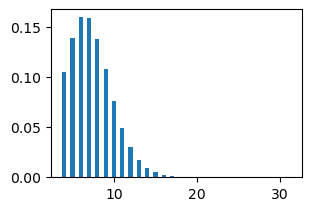

In [42]:
pfs.plot_tde_distr(tde_cnts[1:])

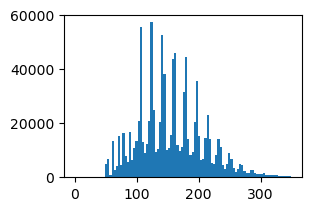

In [43]:
pfs.plot_runtime_hist(runtimes, nbins=100, cutoff_quant=0.99)

In [44]:
# compare recursively computed sample mean with naively computed one
alg.norm(means[-1] - np.mean(samples, axis=(0,1)))

2.646274430334155e-12

In [45]:
# compare recursively computed standard devs with naively computed one
alg.norm(std_devs[-1] - np.std(samples, axis=(0,1)))

6.895755553870924e-05

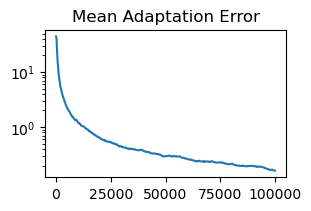

In [46]:
pfs.plot_ada_progress_testing(schedule, means, c, "Mean")

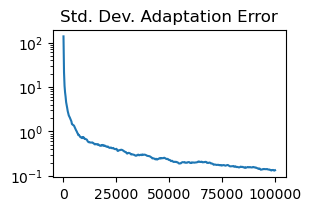

In [47]:
pfs.plot_ada_progress_testing(schedule, std_devs, std, "Std. Dev.")

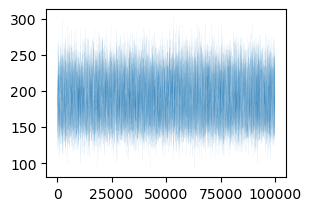

In [48]:
radii = mcu.get_radii(samples[:,0])
pfs.trace_plot(radii)

### Median-Centering and Variance Adjustments

In [49]:
n_burn = int(1e3)
n_its = int(1e5)

In [50]:
c = np.arange(1,d+1)
std = np.arange(2,d+2)

def log_density(x):
    return -alg.norm((x - c) / std)**2 / 2

In [51]:
rets = patt_mcmc(
    log_density,
    n_chains,
    n_burn,
    n_its,
    x_0s,
    cen_mode="medi",
    cov_mode="var",
    hyper_burn=w,
    hyper_att=w,
)

Checking validity of given arguments...
Preparing for parallel sampling...
Preparing for init burn-in period...
Starting init burn-in sampling...
Preparing for ATT sampling...
Starting ATT sampling...


  0%|          | 0/100001 [00:00<?, ?it/s]

Assembling output...


In [52]:
burn_in = rets['burn-in']
samples = rets['samples']
medians = rets['medians']
means = rets['means']
std_devs = rets['std_devs']
schedule = rets['schedule']
tde_cnts = rets['tde_cnts']
runtimes = rets['runtimes']

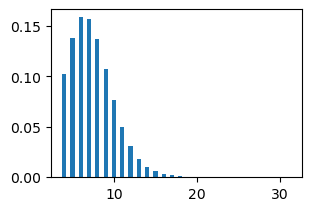

In [53]:
pfs.plot_tde_distr(tde_cnts[1:])

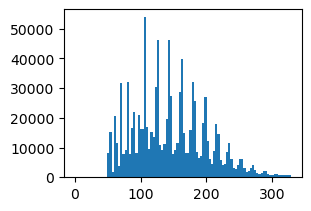

In [54]:
pfs.plot_runtime_hist(runtimes, nbins=100, cutoff_quant=0.99)

In [55]:
# compare recursively computed sample mean with naively computed one
alg.norm(means[-1] - np.mean(samples, axis=(0,1)))

3.035540089348706e-12

In [56]:
# compare recursively computed standard devs with naively computed one
alg.norm(std_devs[-1] - np.std(samples, axis=(0,1)))

6.894121395754054e-05

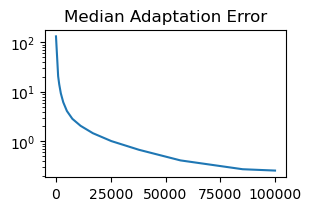

In [57]:
pfs.plot_ada_progress_testing(schedule, medians, c, "Median")

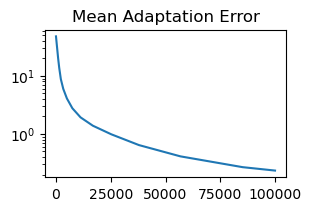

In [58]:
pfs.plot_ada_progress_testing(schedule, means, c, "Mean")

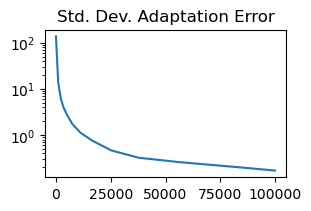

In [59]:
pfs.plot_ada_progress_testing(schedule, std_devs, std, "Std. Dev.")

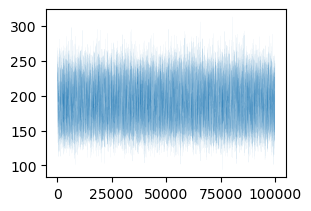

In [60]:
radii = mcu.get_radii(samples[:,0])
pfs.trace_plot(radii)

### Covariance Adjustments

In [61]:
n_burn = int(1e4)
n_its = int(1e5)

In [62]:
corr = 0.75
cov = np.full((d,d), corr) + (1 - corr) * np.identity(d)
inv_cov = alg.inv(cov)

def log_density(x):
    return -np.inner(x, inv_cov @ x) / 2

In [63]:
rets = patt_mcmc(
    log_density,
    n_chains,
    n_burn,
    n_its,
    x_0s,
    cov_mode="cov",
    hyper_burn=w,
    hyper_att=w,
)

Checking validity of given arguments...
Preparing for parallel sampling...
Preparing for init burn-in period...
Starting init burn-in sampling...
Preparing for ATT sampling...
Starting ATT sampling...


  0%|          | 0/100001 [00:00<?, ?it/s]

Assembling output...


In [64]:
burn_in = rets['burn-in']
samples = rets['samples']
means = rets['means']
covs = rets['covs']
schedule = rets['schedule']
tde_cnts = rets['tde_cnts']
runtimes = rets['runtimes']

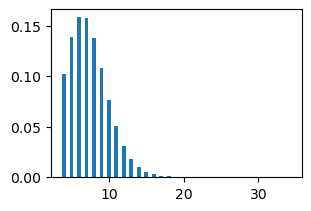

In [65]:
pfs.plot_tde_distr(tde_cnts[1:])

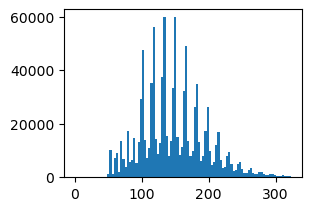

In [66]:
pfs.plot_runtime_hist(runtimes, nbins=100, cutoff_quant=0.99)

In [67]:
# compare recursively computed sample mean with naively computed one
alg.norm(means[-1] - np.mean(samples, axis=(0,1)))

1.2556550492457546e-16

In [68]:
# compare recursively computed covs with naively computed one
alg.norm(covs[-1] - np.cov(samples.reshape(-1,d), rowvar=False))

7.940511982136552e-13

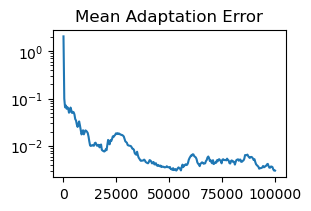

In [69]:
pfs.plot_ada_progress_testing(schedule, means, np.zeros(d), "Mean")

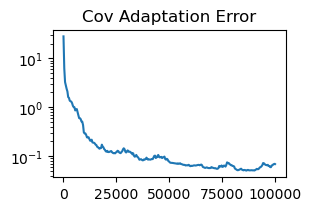

In [70]:
pfs.plot_ada_progress_testing(schedule, covs, cov, "Cov")

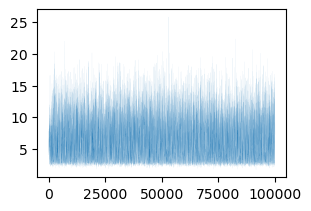

In [71]:
radii = mcu.get_radii(samples[:,0])
pfs.trace_plot(radii)

### Mean-Centering and Covariance Adjustments

In [72]:
n_burn = int(1e4)
n_its = int(1e5)

In [73]:
c = np.arange(1,d+1)
corr = 0.5
cov = np.full((d,d), corr) + (1 - corr) * np.identity(d)
inv_cov = alg.inv(cov)

def log_density(x):
    return -np.inner(x - c, inv_cov @ (x - c)) / 2

In [74]:
rets = patt_mcmc(
    log_density,
    n_chains,
    n_burn,
    n_its,
    x_0s,
    cen_mode="mean",
    cov_mode="cov",
    hyper_burn=w,
    hyper_att=w,
)

Checking validity of given arguments...
Preparing for parallel sampling...
Preparing for init burn-in period...
Starting init burn-in sampling...
Preparing for ATT sampling...
Starting ATT sampling...


  0%|          | 0/100001 [00:00<?, ?it/s]

Assembling output...


In [75]:
burn_in = rets['burn-in']
samples = rets['samples']
means = rets['means']
covs = rets['covs']
schedule = rets['schedule']
tde_cnts = rets['tde_cnts']
runtimes = rets['runtimes']

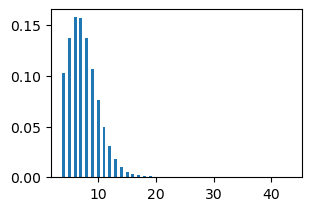

In [76]:
pfs.plot_tde_distr(tde_cnts[1:])

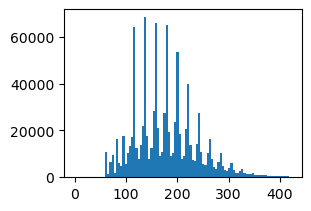

In [77]:
pfs.plot_runtime_hist(runtimes, nbins=100, cutoff_quant=0.99)

In [78]:
# compare recursively computed sample mean with naively computed one
alg.norm(means[-1] - np.mean(samples, axis=(0,1)))

4.0416227725628306e-12

In [79]:
# compare recursively computed covs with naively computed one
alg.norm(covs[-1] - np.cov(samples.reshape(-1,d), rowvar=False))

4.765728514920674e-13

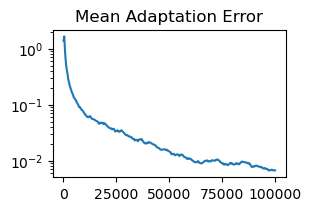

In [80]:
pfs.plot_ada_progress_testing(schedule, means, c, "Mean")

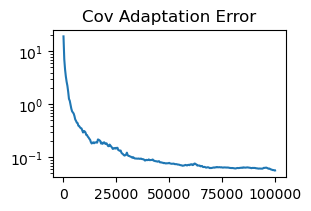

In [81]:
pfs.plot_ada_progress_testing(schedule, covs, cov, "Cov")

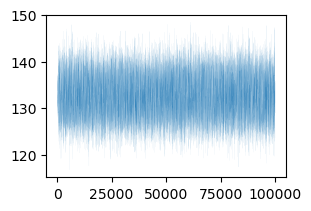

In [82]:
radii = mcu.get_radii(samples[:,0])
pfs.trace_plot(radii)

### Median-Centering and Covariance Adjustments

In [83]:
n_burn = int(1e4)
n_its = int(1e5)

In [84]:
c = np.arange(1,d+1)
corr = 0.5
cov = np.full((d,d), corr) + (1 - corr) * np.identity(d)
inv_cov = alg.inv(cov)

def log_density(x):
    return -np.inner(x - c, inv_cov @ (x - c)) / 2

In [85]:
rets = patt_mcmc(
    log_density,
    n_chains,
    n_burn,
    n_its,
    x_0s,
    cen_mode="medi",
    cov_mode="cov",
    hyper_burn=w,
    hyper_att=w,
)

Checking validity of given arguments...
Preparing for parallel sampling...
Preparing for init burn-in period...
Starting init burn-in sampling...
Preparing for ATT sampling...
Starting ATT sampling...


  0%|          | 0/100001 [00:00<?, ?it/s]

Assembling output...


In [86]:
burn_in = rets['burn-in']
samples = rets['samples']
medians = rets['medians']
means = rets['means']
covs = rets['covs']
schedule = rets['schedule']
tde_cnts = rets['tde_cnts']
runtimes = rets['runtimes']

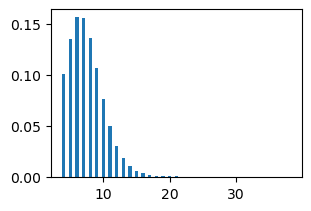

In [87]:
pfs.plot_tde_distr(tde_cnts[1:])

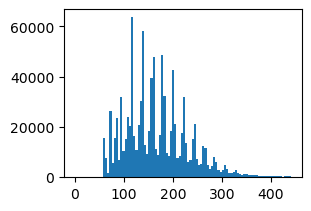

In [88]:
pfs.plot_runtime_hist(runtimes, nbins=100, cutoff_quant=0.99)

In [89]:
# compare recursively computed sample mean with naively computed one
alg.norm(means[-1] - np.mean(samples, axis=(0,1)))

4.155626636418139e-12

In [90]:
# compare recursively computed covs with naively computed one
alg.norm(covs[-1] - np.cov(samples.reshape(-1,d), rowvar=False))

4.884916176935074e-13

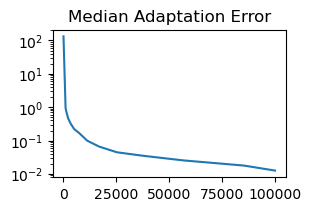

In [91]:
pfs.plot_ada_progress_testing(schedule, medians, c, "Median")

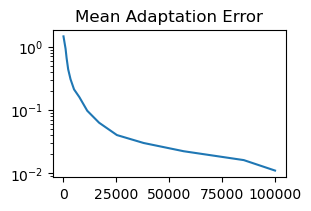

In [92]:
pfs.plot_ada_progress_testing(schedule, means, c, "Mean")

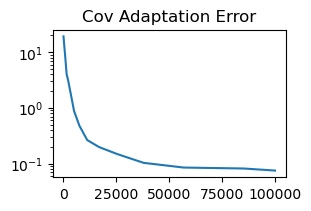

In [93]:
pfs.plot_ada_progress_testing(schedule, covs, cov, "Cov")

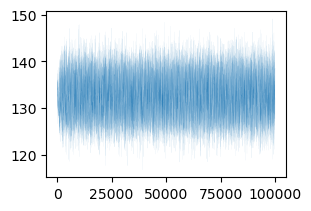

In [94]:
radii = mcu.get_radii(samples[:,0])
pfs.trace_plot(radii)